In [1]:
# Import the necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

/var/folders/ck/pvqs1h5d01z12m92pr0kgwnh0000gp/T/ipykernel_52509/4149993422.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
def model_fit(m, X, y, plot = False):
    """Returns the mean squared error, root mean squared error and R^2 value of a fitted model based 
    on provided X and y values.
    
    Args:
        m: sklearn model object
        X: model matrix to use for prediction
        y: outcome vector to use to calculating rmse and residuals
        plot: boolean value, should fit plots be shown 
    """
    
    y_hat = m.predict(X)
    MSE = mean_squared_error(y, y_hat)
    RMSE = np.sqrt(mean_squared_error(y, y_hat))
    Rsqr = r2_score(y, y_hat)
    
    Metrics = (round(MSE, 4), round(RMSE, 4), round(Rsqr, 4))
    
    res = pd.DataFrame(
        data = {'y': y, 'y_hat': y_hat, 'resid': y - y_hat}
    )
    
    if plot:
        plt.figure(figsize=(12, 6))
        
        plt.subplot(121)
        sns.lineplot(x='y', y='y_hat', color="grey", data =  pd.DataFrame(data={'y': [min(y),max(y)], 'y_hat': [min(y),max(y)]}))
        sns.scatterplot(x='y', y='y_hat', data=res).set_title("Actual vs Fitted plot")
        
        plt.subplot(122)
        sns.scatterplot(x='y_hat', y='resid', data=res).set_title("Fitted vs Residual plot")
        plt.hlines(y=0, xmin=np.min(y), xmax=np.max(y), linestyles='dashed', alpha=0.3, colors="black")
        
        plt.subplots_adjust(left=0.0)
        
        plt.suptitle("Model (MSE, RMSE, Rsqr) = " + str(Metrics), fontsize=14)
        plt.show()
    
    return MSE, RMSE, Rsqr

## Exploratory Data Analysis

In [4]:
df_weather = pd.DataFrame(pd.read_excel("/Users/AlexDronov/Desktop/Maths/Year 4/Semester 2/Solar panel/Copy of Loanhead_weatherdata_01Jul22-13Feb24.xlsx", skiprows=3)) 
output_df = pd.DataFrame(pd.read_csv("/Users/AlexDronov/Desktop/Maths/Year 4/Semester 2/Solar panel/UG_Solar_Challenge/SolarFarm_Data/Solar_0709NE001M.csv"))

In [98]:
# A function that transforms the data using the average method
# Use 'D' for daily average, 'W' for weekly average
def daily_average(df, frequency):
    df = df[['READING DATE', 'Value']].copy()
    df['READING DATE'] = pd.to_datetime(df['READING DATE'], format= '%d/%m/%Y')
    df['Value'] = pd.to_numeric(df['Value'], errors='coerce')
    daily_avg_df = df.groupby(pd.Grouper(key='READING DATE', freq = frequency)).mean().reset_index()
    
    return daily_avg_df 

# A function that plots the columns of the dataframe against time
def plot_against_time(df):
    df_wo_time = df.drop(['time'], axis = 1)
    fig = plt.figure(figsize=(20,15))
    for i,col in enumerate(df_wo_time.columns):
        ax = fig.add_subplot(5,4,i+1)
        sns.scatterplot(data=df, x = 'time', y = col, ax=ax)
        ax.set_xlabel("Time")
        
    plt.show()

In [5]:
df_weather.head()

,time,temperature_2m (°C),relative_humidity_2m (%),dew_point_2m (°C),precipitation (mm),cloud_cover (%),shortwave_radiation (W/m²),direct_radiation (W/m²),diffuse_radiation (W/m²),direct_normal_irradiance (W/m²),global_tilted_irradiance (W/m²),terrestrial_radiation (W/m²),shortwave_radiation_instant (W/m²),direct_radiation_instant (W/m²),diffuse_radiation_instant (W/m²),direct_normal_irradiance_instant (W/m²),global_tilted_irradiance_instant (W/m²),terrestrial_radiation_instant (W/m²)
0,2022-11-01 00:00:00,11.5,83,8.6,0.5,94,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2022-11-01 01:00:00,10.9,87,8.8,1.2,70,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2022-11-01 02:00:00,10.7,93,9.6,1.2,100,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2022-11-01 03:00:00,10.8,93,9.7,0.7,100,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2022-11-01 04:00:00,10.5,94,9.6,0.7,100,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
df_weather.shape

(11208, 18)

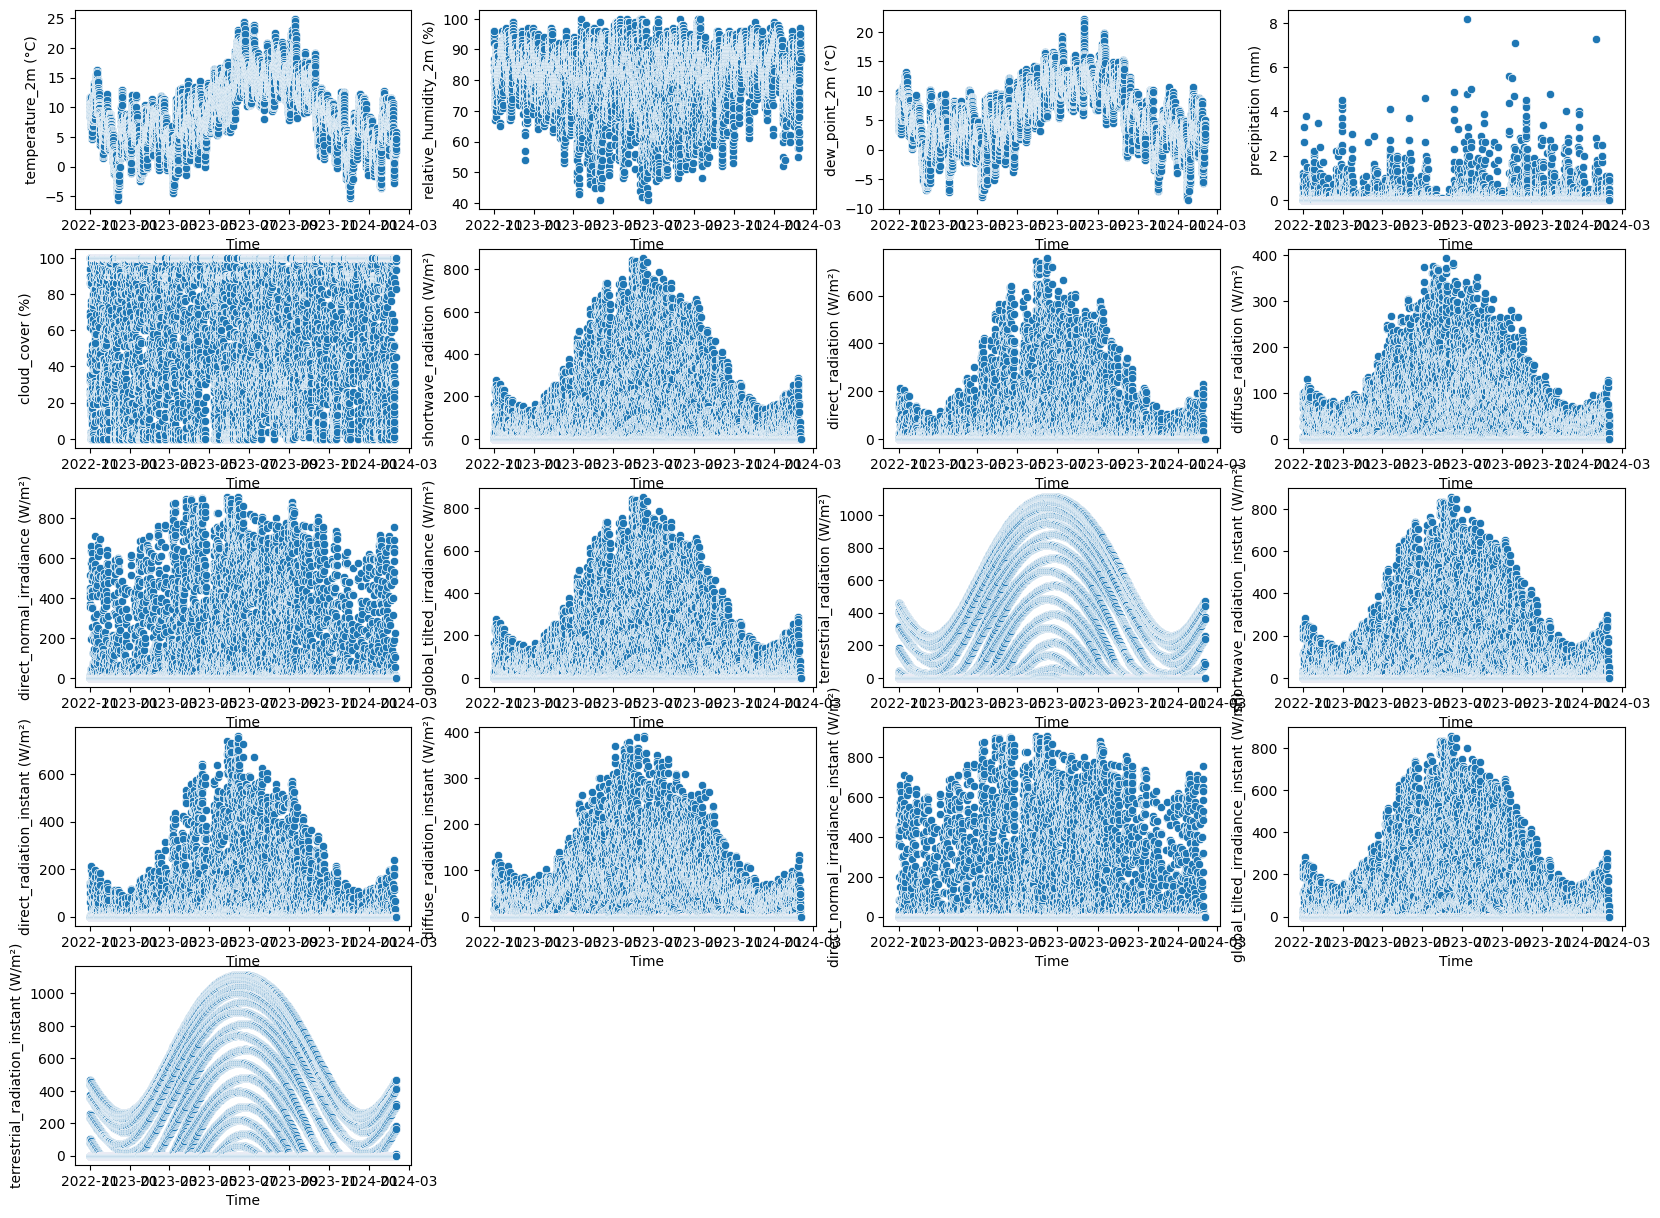

In [10]:
plot_against_time(df_weather)

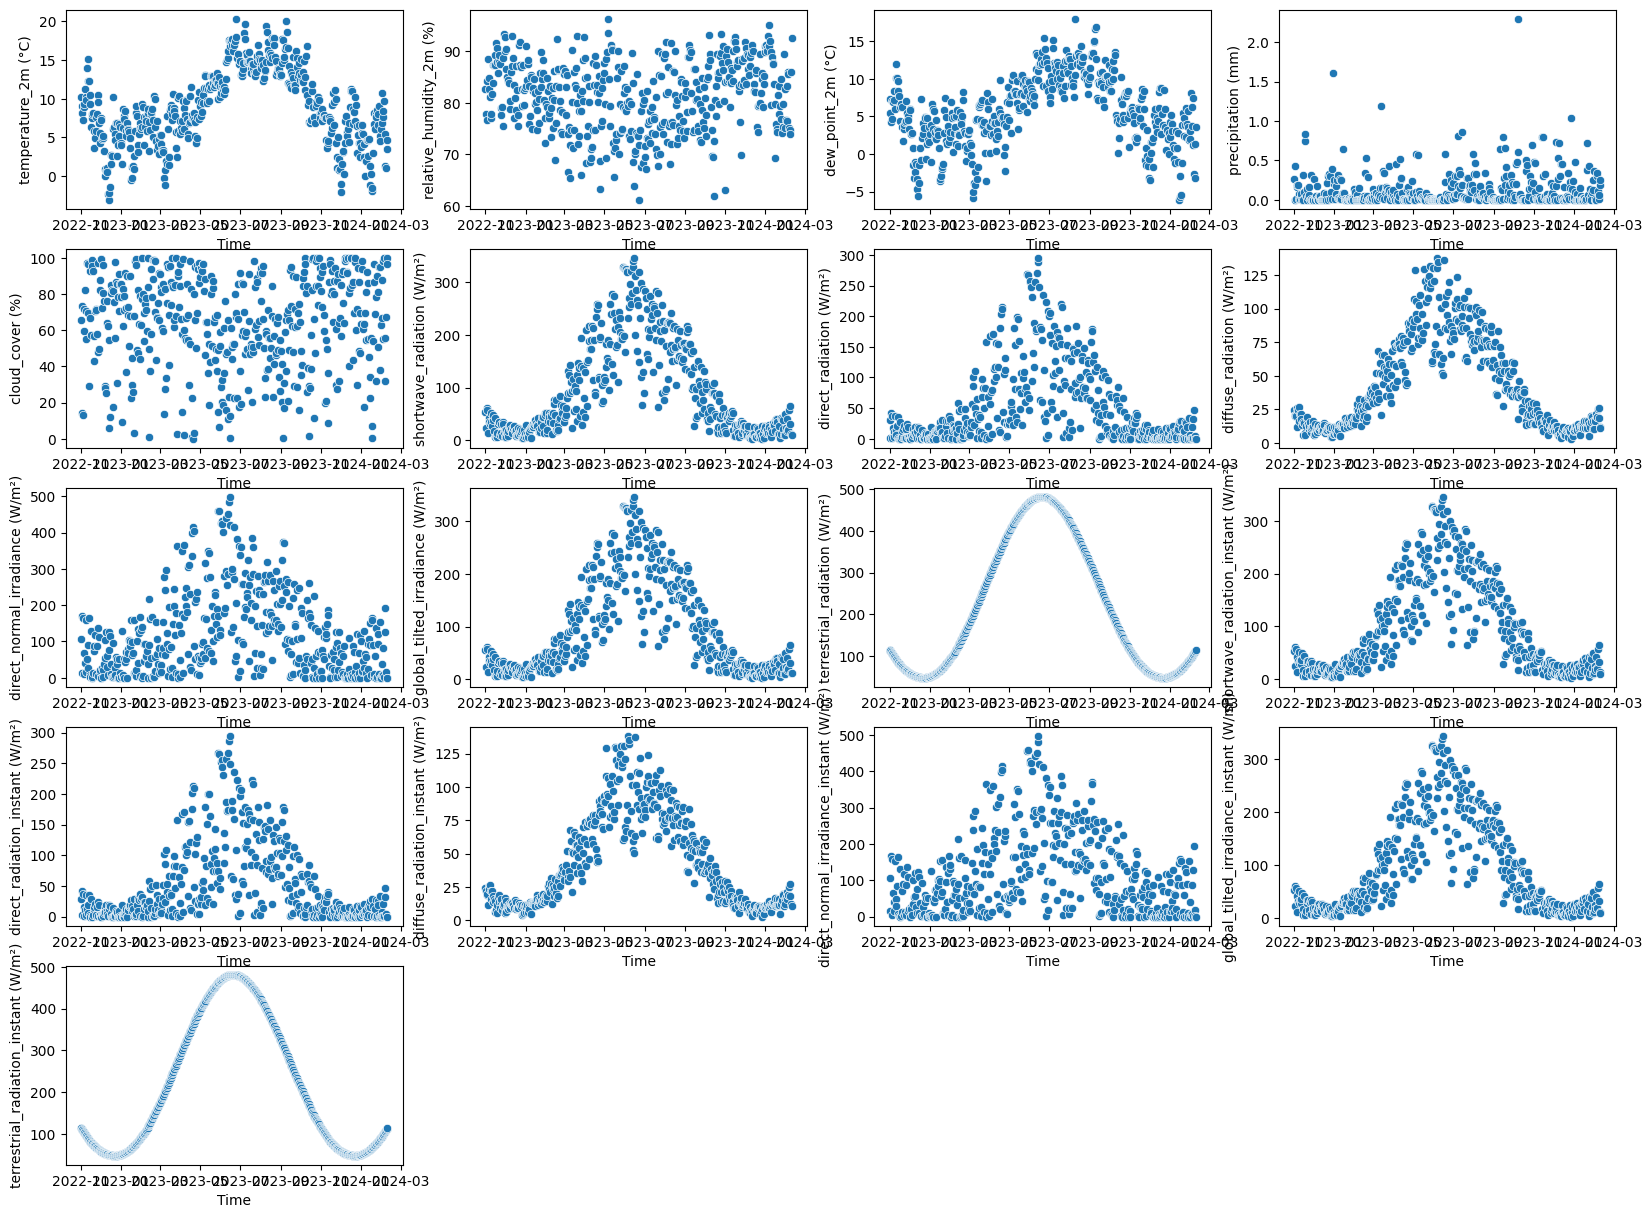

In [11]:
plot_against_time(daily_average(df_weather, 'D'))

In [12]:
X = df_weather.copy()
X.shape

(11208, 18)

In [14]:
y = output_df.copy()
y = y.melt(id_vars=['READING DATE'],
           var_name='Time',
           value_name='Value')
y = y.sort_values(by=['READING DATE', 'Time']).reset_index(drop=True)
index = np.arange(1, y.shape[0], 2).tolist()
y = y.drop(index).reset_index(drop=True)
y

,READING DATE,Time,Value
0,01/01/2023,00:00,0.00000
1,01/01/2023,01:00,0.00000
2,01/01/2023,02:00,0.00000
3,01/01/2023,03:00,0.00000
4,01/01/2023,04:00,0.00000
...,...,...,...
11203,31/12/2023,19:00,10.22169
11204,31/12/2023,20:00,10.22169
11205,31/12/2023,21:00,10.22169
11206,31/12/2023,22:00,10.22169


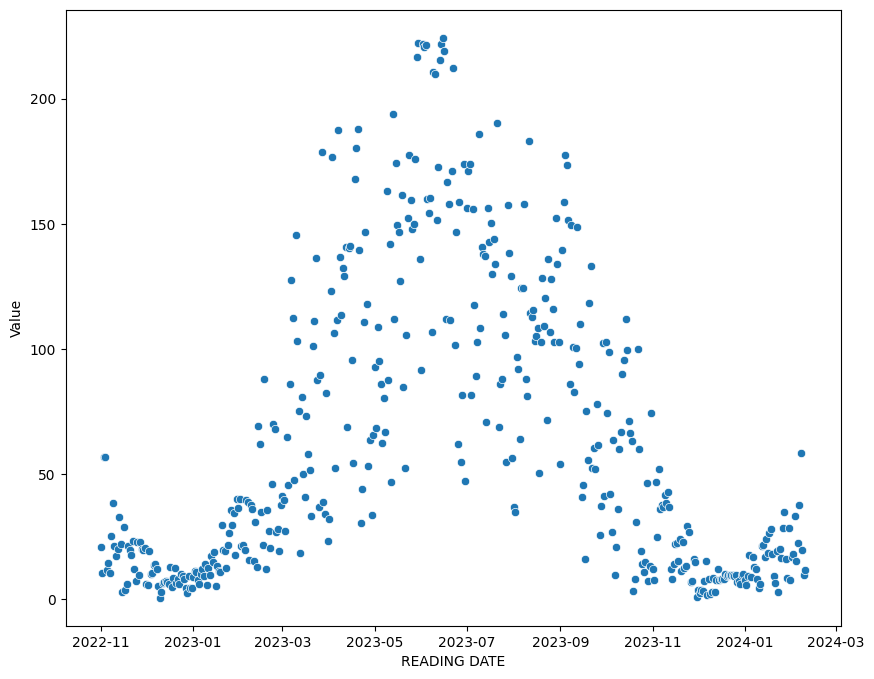

In [100]:
fig = plt.figure(figsize=(10,8))
sns.scatterplot(data=daily_average(y, 'D'), x = 'READING DATE', y = 'Value')
plt.show()

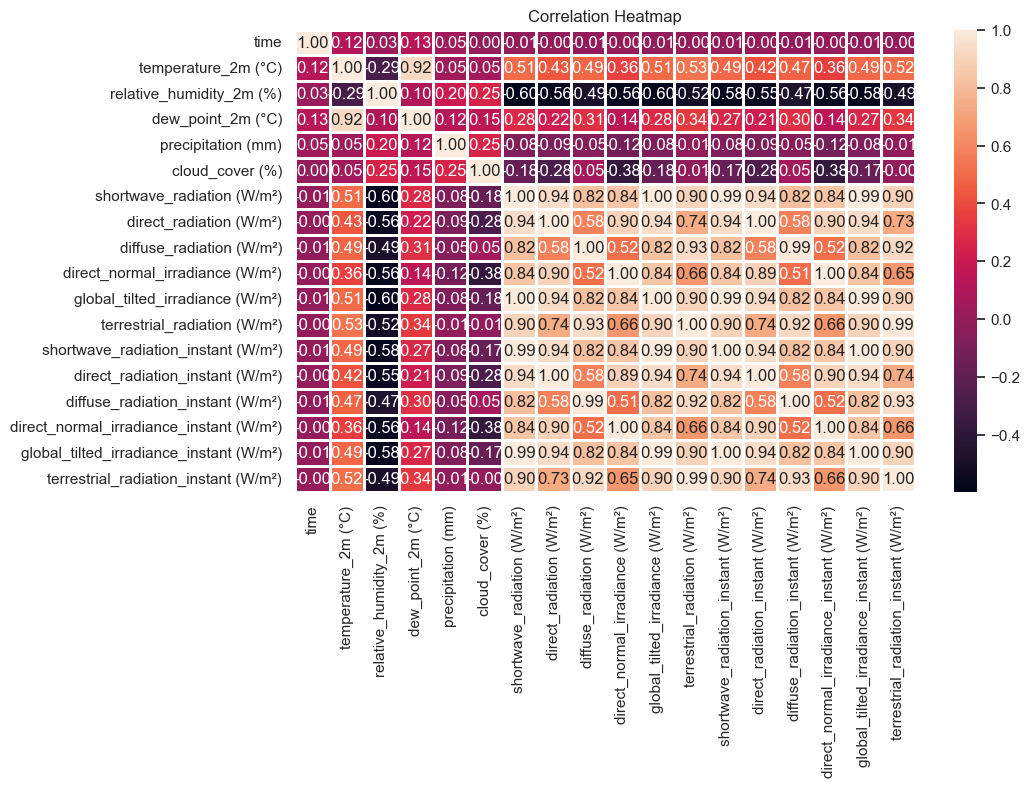

In [101]:
sns.set(rc={'figure.figsize': (10, 6)})
sns.heatmap(X.corr(), annot = True, fmt = '.2f', linewidths = 2)
plt.title("Correlation Heatmap")
plt.show()

<Axes: xlabel='global_tilted_irradiance_instant (W/m²)', ylabel='global_tilted_irradiance (W/m²)'>

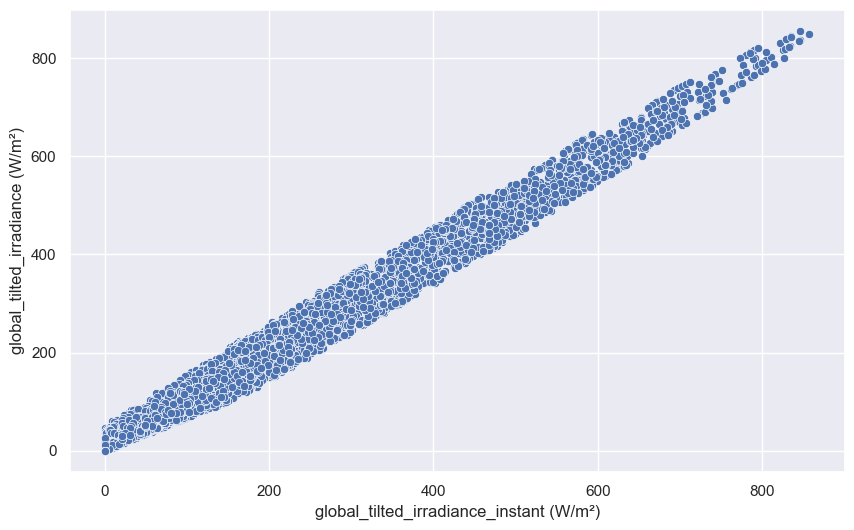

In [102]:
sns.scatterplot(data=df_weather, x = 'global_tilted_irradiance_instant (W/m²)', y = 'global_tilted_irradiance (W/m²)')

In [104]:
scaler = StandardScaler()
df_weather.drop(['time'], axis=1)
X_copy = scaler.fit_transform(df_weather.drop(['time'], axis=1))

## PCA 

In [105]:
pca_x = PCA(n_components=3)
pca_x.fit(X_copy)

PCA(n_components=3)

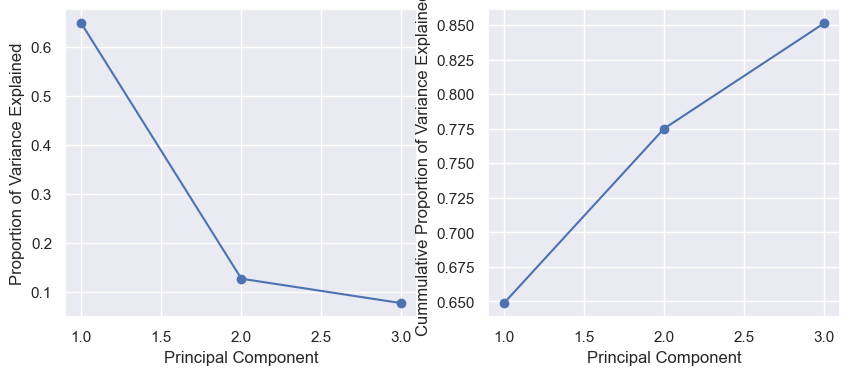

In [106]:
fig, ax = plt.subplots(1,2, figsize = (10,4))
ticks = np.arange(pca_x.n_components_)+1
ax[0].plot(ticks, pca_x.explained_variance_ratio_, marker='o')
ax[0].set_xlabel('Principal Component')
ax[0].set_ylabel('Proportion of Variance Explained')
ax[1].plot(ticks, pca_x.explained_variance_ratio_.cumsum(), marker='o')
ax[1].set_xlabel('Principal Component')
ax[1].set_ylabel('Cummulative Proportion of Variance Explained')
plt.show()

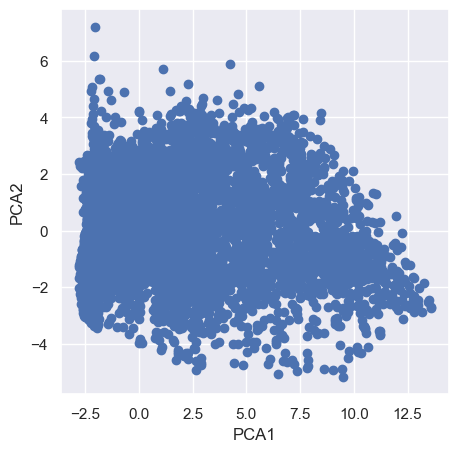

In [107]:
scores = pca_x.transform(X_copy)

i, j = 0, 1 #component indicies 
fig, ax = plt.subplots(1,1,figsize=(5, 5))
ax.scatter(scores[:,i], scores[:,j])
ax.set_xlabel('PCA%d' % (i+1))
ax.set_ylabel('PCA%d' % (j+1))
plt.show()

In [108]:
loadings = pd.DataFrame(pca_x.components_.T, columns=['PC1', 'PC2', 'PC3'], index = df_weather.drop(['time'], axis=1).columns.values)
loadings

,PC1,PC2,PC3
temperature_2m (°C),0.168721,0.383500,-0.459809
relative_humidity_2m (%),-0.187172,0.205362,-0.131471
dew_point_2m (°C),0.098308,0.482160,-0.530044
precipitation (mm),-0.026663,0.260410,-0.037785
cloud_cover (%),-0.056566,0.447435,0.301031
shortwave_radiation (W/m²),0.298688,-0.022326,0.022870
direct_radiation (W/m²),0.276846,-0.158698,-0.155292
diffuse_radiation (W/m²),0.252636,0.213484,0.316514
direct_normal_irradiance (W/m²),0.257592,-0.241613,-0.188888
global_tilted_irradiance (W/m²),0.298688,-0.022326,0.022870


In [109]:
print(X_copy.shape, y.shape)

(11208, 17) (11208, 3)


In [110]:
X_train, X_test, y_train, y_test = train_test_split(X_copy, y['Value'], test_size=0.3, random_state=0)

regr = LinearRegression()
regr.fit(X_train, y_train)

pred = regr.predict(X_test)
mean_squared_error(y_test, pred)

9896.15581812018

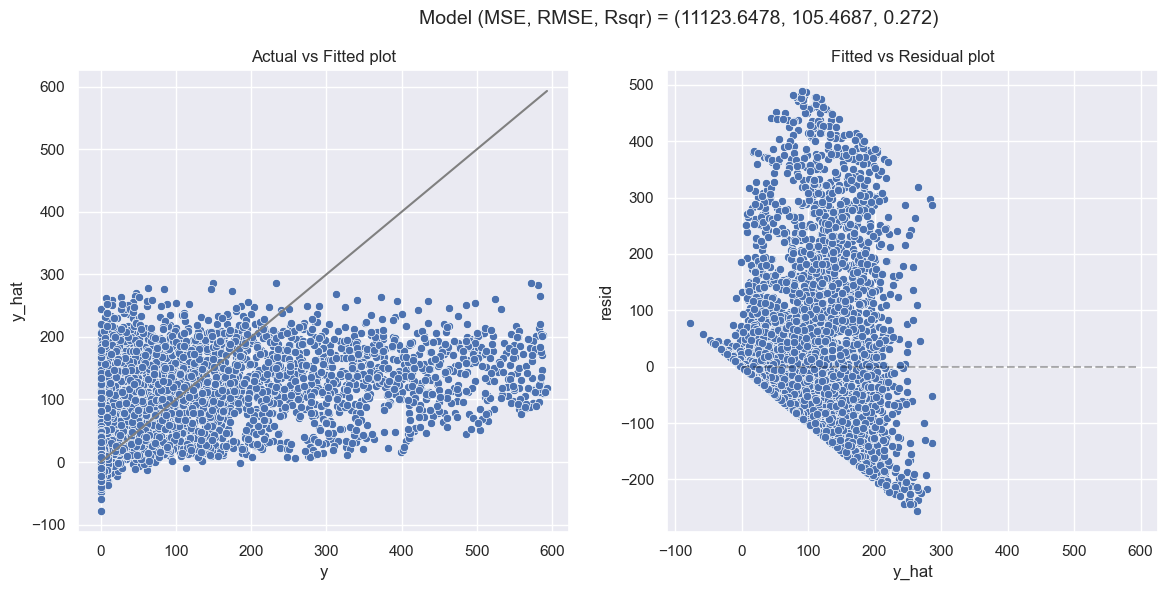

(11123.647767020318, 105.46870515475345, 0.27199741942631506)

In [111]:
model_fit(m = regr.fit(X_train, y_train), X=X_train, y = y_train, plot=True)

1. Do PCA on a selection of features (on features with most correlation), fit a linear regression, no time
2. Do PCA on everything, fit a linear, no time
3. Deduce which PCA works best
4. On that PCA, try a non-linear
5. On that PCA, try with time
6. Compare the results, hope for the best